In [ ]:
#importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
!pip install pandas plotnine
from plotnine import *
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=4) 

In [ ]:
from google.colab import files
uploaded = files.upload()
datawhite = pd.read_csv("winequality_white.csv")
data.head()

Saving winequality_white.csv to winequality_white (5).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from google.colab import files
uploaded = files.upload()
datared = pd.read_csv("winequality_red.csv")
data.head()

Saving winequality_red.csv to winequality_red (5).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
datared["color"] = "R"

In [ ]:
datawhite["color"] = "W"

In [ ]:
df_all=pd.concat([datared,datawhite],axis=0)

In [ ]:
df_all.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [ ]:
datawhite.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [ ]:
datared.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [ ]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [ ]:
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [ ]:
df = pd.get_dummies(df_all, columns=["color"])

**Assess Data Quality & Missing Values**

In [ ]:
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [ ]:
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
print("white mean = ",datawhite["quality"].mean())
print("red mean =",datared["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [ ]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


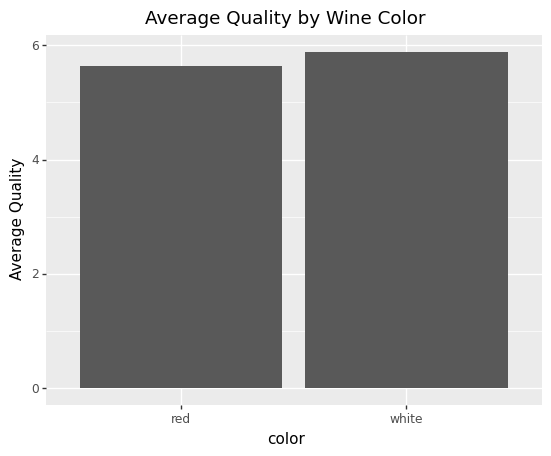

<ggplot: (-9223363301431929400)>

In [ ]:
ggplot(df_mean, aes(x='color', weight='mean_quality')) + geom_bar() +\
    labs(y = "Average Quality", title = "Average Quality by Wine Color")

#SUBPLOTS WHITE AND RED WINE

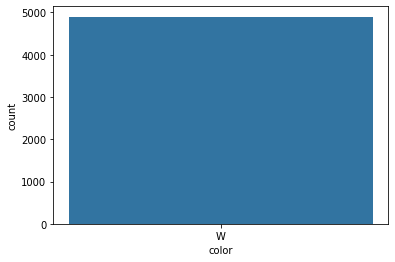

In [ ]:
sns.countplot(x="color",data=datawhite)



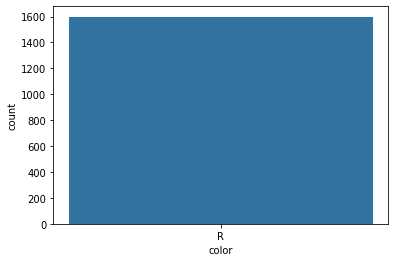

In [ ]:
sns.countplot(x="color",data=datared)

# **GG PLOT**

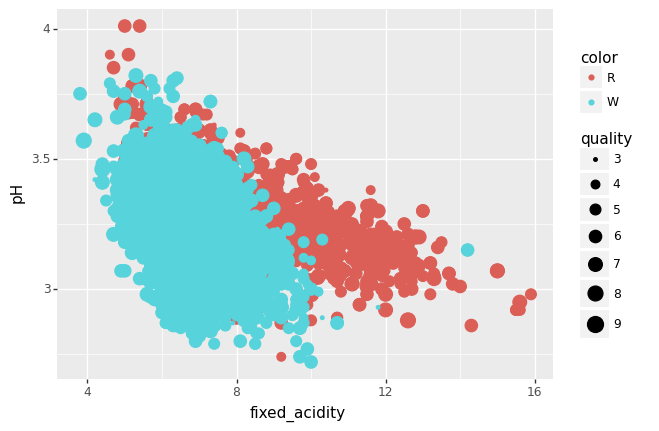

<ggplot: (-9223363301431887349)>

In [ ]:
ggplot(df_all, aes(x='fixed_acidity', y='pH', color='color',size='quality')) + geom_point()

# **FACE PLOT**

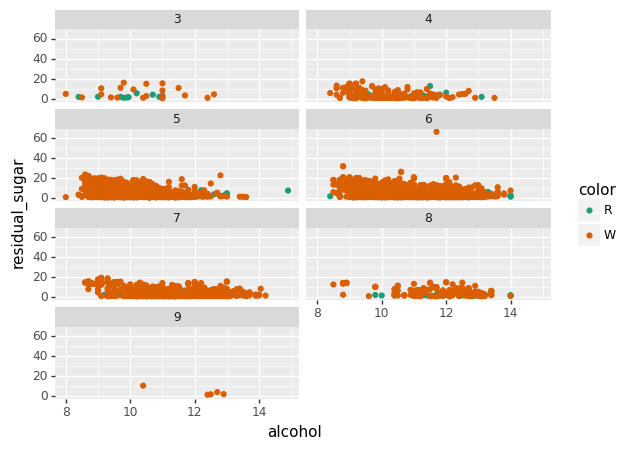

<ggplot: (-9223363301433191943)>

In [ ]:
ggplot(df_all, aes(x='alcohol', y='residual_sugar', color='color')) + geom_point() +\
    facet_wrap('quality', ncol=2) + scale_color_brewer(type = 'qual', palette = 'Dark2')


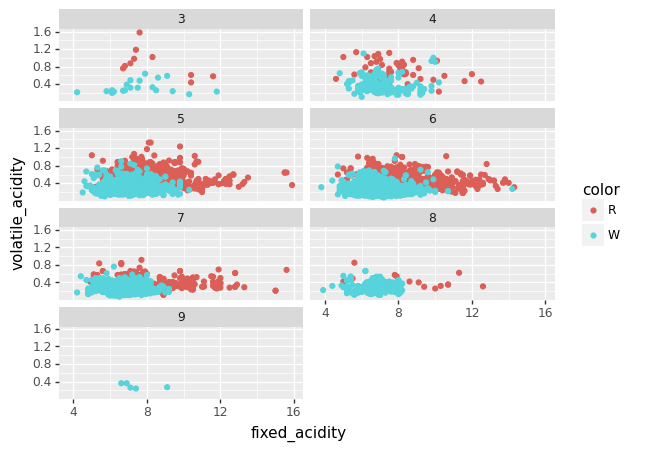

<ggplot: (8735421583624)>

In [ ]:
ggplot(df_all, aes(x='fixed_acidity', y='volatile_acidity', color='color')) + geom_point() + facet_wrap('quality', ncol=2)

CORRELATION HEAT MAPS 

**WHITE WINE**

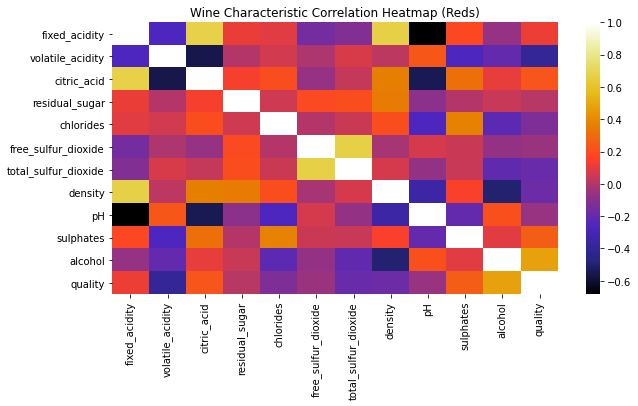

In [ ]:
plt.subplots(figsize=(10,5))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = datared.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="CMRmap")

**RED WINE**

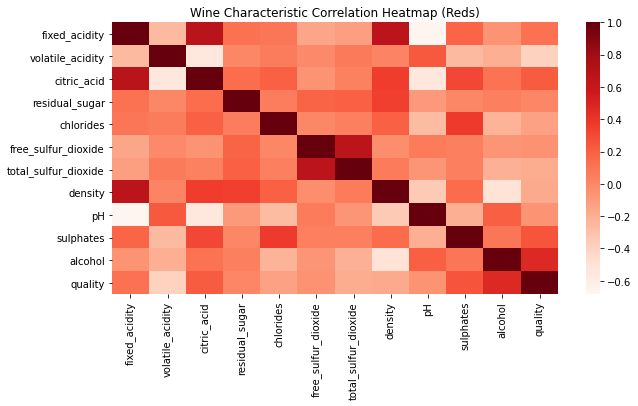

In [ ]:
plt.subplots(figsize=(10,5))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = datared.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()


# **Biggest Differences between White and Red Correlations **

# Red Pearson's Correlation - White Pearson's Correlation
There are some noteable differences in the way that certain variables interact depending on the variety of wine. The darker the square, the larger the difference that interaction is between Red and White wines.

For instance, the correlation between alcohol and sugar content is much higher for Red wines than it is for white wines (boozy reds have more sugar than less boozy reds, while boozy whites have less sugar than less boozy whites). Closer inspection indicates that the correlation between sugar and alcohol is positive for Red wines (weak positive, 0.042), but it is much more strongly negative for White wines (-0.45).

In [ ]:
df_r_corr=datared.corr()
df_w_corr=datawhite.corr()

In [ ]:
df_r_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
df_w_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [ ]:
diff_corr = df_r_corr - df_w_corr

**CORRELATION DIFFERNCE B/W RED AND WHITE WINES**

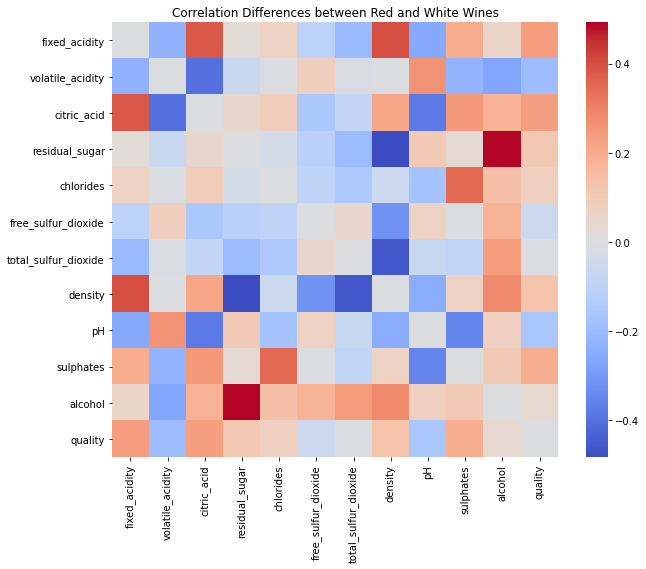

In [ ]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

In [ ]:
results1 = smf.ols('quality ~ total_sulfur_dioxide + free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density + color_R', data=df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:34:18   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.7597 

In [ ]:
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]

X=train[cols]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.54


In [ ]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]

Xtest=test[cols]


In [ ]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.54


In [ ]:
train2, test2 = train_test_split(df, test_size=0.4, random_state=4)

In [ ]:
y2 = train2["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]
X2=train2[cols]
regr.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ytrain_pred2 = regr.predict(X2)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y2, ytrain_pred2))

In-sample Mean squared error: 0.53


In [ ]:
ytest2 = test2["quality"]
Xtest2=test2[cols]

In [ ]:
ypred2 = regr.predict(Xtest2)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest2, ypred2))

Out-of-sample Mean squared error: 0.55


# LinReg on Segmented Data (80/20 splits for both segments) 


# **White Wine Model **

In [ ]:
w_train, w_test = train_test_split(datawhite, test_size=0.2)

In [ ]:
results_w = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=datawhite).fit()
print(results_w.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:49:22   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [ ]:
y_w = w_train["quality"]
cols_w = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_w=w_train[cols_w]
regr.fit(X_w,y_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ytrain_predw = regr.predict(X_w)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_w, ytrain_predw))

In-sample Mean squared error: 0.57


In [ ]:
ytestw = w_test["quality"]
Xtestw = w_test[cols_w]
ypredw = regr.predict(Xtestw)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestw, ypredw))

Out-of-sample Mean squared error: 0.53


# *RED WINE MODEL*

In [ ]:
r_train, r_test = train_test_split(datared, test_size=0.2)

In [ ]:
results_r = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=datared).fit()
print(results_r.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.29e-138
Time:                        08:55:23   Log-Likelihood:                -1592.8
No. Observations:                1599   AIC:                             3204.
Df Residuals:                    1590   BIC:                             3252.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              38.7744    

In [ ]:
y_r = r_train["quality"]
cols_r = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_r=r_train[cols_r]
regr.fit(X_r,y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ytrain_predr = regr.predict(X_r)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_r, ytrain_predr))

In-sample Mean squared error: 0.42


In [ ]:
ytestr = r_test["quality"]
Xtestr = r_test[cols_r]
ypredr = regr.predict(Xtestr)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestr, ypredr))

Out-of-sample Mean squared error: 0.47


## combine the result 

In [ ]:
y_both = pd.concat([y_w,y_r])

In [ ]:
ytrain_predW=pd.DataFrame(ytrain_predw)
ytrain_predR=pd.DataFrame(ytrain_predr)

y_train_predboth = pd.concat([ytrain_predW,ytrain_predR])

In [ ]:
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_both, y_train_predboth))

In-sample Mean squared error: 0.54


In [ ]:
ytestboth = pd.concat([ytestw,ytestr])
Xtestboth = pd.concat([Xtestw,Xtestr])
                                          
ypredboth = pd.concat([pd.DataFrame(ypredw),pd.DataFrame(ypredr)])
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestboth, ypredboth))

Out-of-sample Mean squared error: 0.51


In [ ]:
from sklearn import svm
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","color_R"]
X=train[cols]

clf = svm.SVR(C=1.0, epsilon=0.2)
clf.fit(X, y) 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
ytrain_pred = clf.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.61


In [ ]:
ytest = test["quality"]
Xtest=test[cols]


In [ ]:
ypred = clf.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.62
